<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/IrisSpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout

# Load the Iris dataset
iris=load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris.data # Features: Sepal length, Sepal width, Petal length, Petal width
Y = iris.target

In [ ]:
Y1 = iris.target.reshape(-1, 1)   # Labels; 0, 1, 2

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
Y1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
# One-hot encode (since it's a multi-class problem)
encoder = OneHotEncoder(sparse_output=False)  # Changed 'sparse' to 'sparse_output'
Y_encoded = encoder.fit_transform(Y1)

In [ ]:
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# Split into training(80%) and test(20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
# Standardized features (important for training stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the Single-Layer Perceptron model
model = Sequential({
    Dense(3, activation = 'softmax', input_shape = (4,))     # 3 Neurons (one per class), Softmax activation
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model (using Categorical Cross-Entropy for multi-class classification)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with validation data
history = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.4062 - loss: 1.2387 - val_accuracy: 0.5417 - val_loss: 0.7363
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5312 - loss: 0.9109 - val_accuracy: 0.7083 - val_loss: 0.6240
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7214 - loss: 0.7369 - val_accuracy: 0.7917 - val_loss: 0.5588
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.6573 - val_accuracy: 0.7917 - val_loss: 0.5179
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8242 - loss: 0.5790 - val_accuracy: 0.7917 - val_loss: 0.4900
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8086 - loss: 0.5575 - val_accuracy: 0.7917 - val_loss: 0.4701
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8333 - loss: 0.4766 - val_accuracy: 0.7917 - val_loss: 0.4553
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8125 - loss: 0.4832 - val_accuracy: 0.8750 - val_loss: 0.4442

In [ ]:
# Evaluate model accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(f"\nTest accuracy: {test_acc:4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9000 - loss: 0.3555

Test accuracy: 0.900000


In [ ]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
predicted_classes =np.argmax(predictions, axis=1)

In [ ]:
predicted_classes

array([1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
actual_classes = np.argmax(predictions, axis=1)

In [ ]:
actual_classes

array([1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# Print predictions
print("\nPredictions vs Actual Labels:")
for i in range(3): # Show first 10 predictions
   print(f"Predicted: {predicted_classes[i]}, Actual:{actual_classes[i]},") # Changed Actual to actual_classes


Predictions vs Actual Labels:
Predicted: 1, Actual:1,
Predicted: 0, Actual:0,
Predicted: 2, Actual:2,


In [ ]:
# Generate Classification report
from sklearn.metrics import classification_report
report = classification_report(actual_classes, predicted_classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



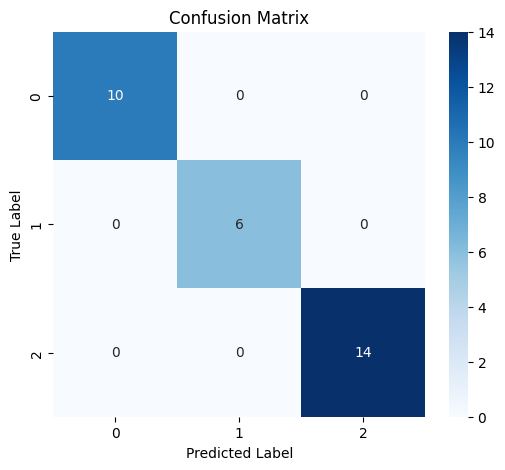

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

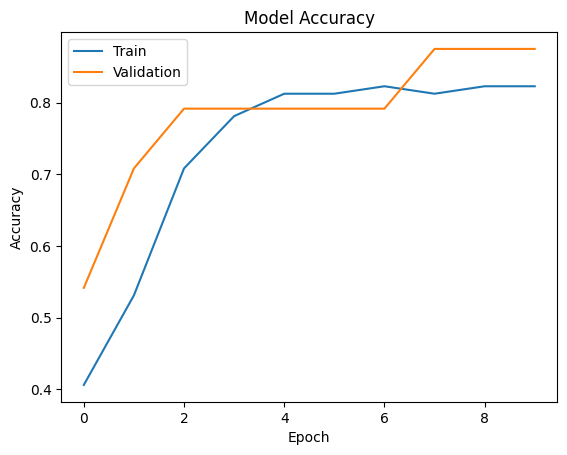

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuray')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

**WITH HIDDEN LAYERS**

In [ ]:
# Build the Single-Layer Perceptron model
model = Sequential([
    Dense(5, activation = 'relu', input_shape=(4,)),# Adding hidden layer with 8 neurons
    Dense(10, activation = 'leaky_relu'),
    Dense(12, activation = 'relu'),
    Dense(3, activation = 'softmax')     # 3 Neurons (one per class), Softmax activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model (using Categorical Cross-Entropy for multi-class classification)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with validation data
history = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3802 - loss: 1.0742 - val_accuracy: 0.2500 - val_loss: 1.0871
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4258 - loss: 0.9302 - val_accuracy: 0.3333 - val_loss: 0.9582
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6445 - loss: 0.8041 - val_accuracy: 0.5000 - val_loss: 0.8884
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7044 - loss: 0.7234 - val_accuracy: 0.4583 - val_loss: 0.8401
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6888 - loss: 0.6817 - val_accuracy: 0.4583 - val_loss: 0.8071
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7122 - loss: 0.5841 - val_accuracy: 0.4583 - val_loss: 0.7818
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7135 - loss: 0.6227 - val_accuracy: 0.5000 - val_loss: 0.7603
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7266 - loss: 0.5828 - val_accuracy: 0.5000 - val_loss: 0.7404

In [ ]:
# Evaluate model accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(f"\nTest accuracy: {test_acc:4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6333 - loss: 0.5861

Test accuracy: 0.633333


In [ ]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
predicted_classes

array([1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
actual_classes = np.argmax(predictions, axis=1)

In [ ]:
actual_classes

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
# Print predictions
print("\nPredictions vs Actual Labels:")
for i in range(3): # Show first 10 predictions
   print(f"Predicted: {predicted_classes[i]}, Actual:{actual_classes[i]},") # Changed Actual to actual_classes


Predictions vs Actual Labels:
Predicted: 1, Actual:1,
Predicted: 0, Actual:0,
Predicted: 2, Actual:1,


In [ ]:
# Generate Classification report
from sklearn.metrics import classification_report
report = classification_report(actual_classes, predicted_classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.30      0.46        20
           2       0.00      0.00      0.00         0

    accuracy                           0.53        30
   macro avg       0.67      0.43      0.49        30
weighted avg       1.00      0.53      0.64        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


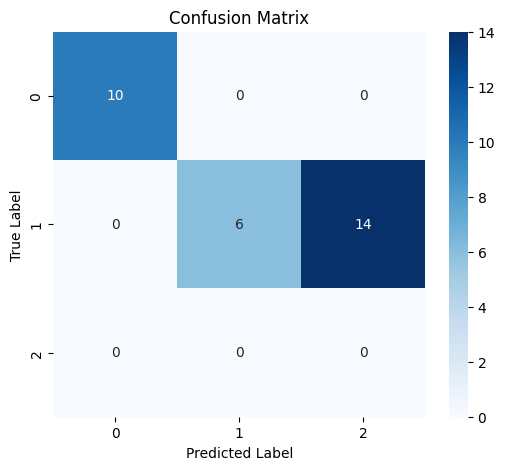

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

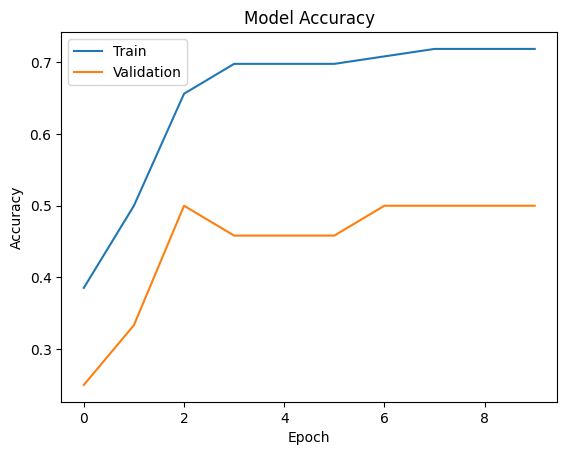

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuray')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

history = model.fit(X_train, Y_train, epochs=50, batch_size = 8, validation_data=((X_test,Y_test)))
# Evaluate model accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(f"\nTest accuracy: {test_acc:4f}")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6846 - loss: 0.9663 - val_accuracy: 0.8667 - val_loss: 0.5109
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8051 - loss: 0.4955 - val_accuracy: 0.9333 - val_loss: 0.2904
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8876 - loss: 0.3216 - val_accuracy: 0.9667 - val_loss: 0.2108
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8651 - loss: 0.2985 - val_accuracy: 1.0000 - val_loss: 0.1640
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9781 - loss: 0.1584 - val_accuracy: 1.0000 - val_loss: 0.1147
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9149 - loss: 0.1644 - val_accuracy: 1.0000 - val_loss: 0.0952
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9746 - loss: 0.1109 - val_accuracy: 1.0000 - val_loss: 0.0735
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9783 - loss: 0.1030 - val_accuracy: 1.0000 - val_l

In [ ]:
model = Sequential([
    Input(shape=(4,)),
    Dense(32, activation = 'relu'),
    BatchNormalization(),   # Normalizes activation for stable Learning
    Dropout(0.2),   # Prevents Overfitting
    Dense(16, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = tf.keras.optimizers.Adam(learning_rate=0.05))

history = model.fit(X_train, Y_train, epochs=50, batch_size = 8, validation_split=0.2)
# Evaluate Model Accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(f"\nTest accuracy: {test_acc:4f}")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6189 - loss: 0.9016 - val_accuracy: 0.5417 - val_loss: 0.6438
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7983 - loss: 0.5410 - val_accuracy: 0.9583 - val_loss: 0.3823
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8360 - loss: 0.2638 - val_accuracy: 0.9167 - val_loss: 0.2938
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9793 - loss: 0.1158 - val_accuracy: 0.9583 - val_loss: 0.3187
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9526 - loss: 0.2772 - val_accuracy: 0.9167 - val_loss: 0.2737
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9280 - loss: 0.2868 - val_accuracy: 0.7083 - val_loss: 0.3122
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9504 - loss: 0.1536 - val_accuracy: 0.9167 - val_loss: 0.1919
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9841 - loss: 0.1108 - val_accuracy: 1.0000 - val_

In [ ]:
# Save the trained model
model.save("iris_model.h5")
print("\nModel saved Successfully!")


Model saved Successfully!


In [ ]:
# prompt: standardization

# ... (Your existing code) ...

# Standardized features (important for training stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ... (Rest of your code) ...


In [ ]:
!pip install streamlit pyngrok

In [ ]:
streamlit_code = """
import streamlit as st
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = tf.keras.models.load_model("iris_model.h5")

# Function to predict the Iris species
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    scaler = StandardScaler()
    input_data = scaler.fit_transform(input_data)
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)

    iris_species = {
        0: "Iris-setosa",
        1: "Iris-versicolor",
        2: "Iris-virginica"
    }

    return iris_species.get(predicted_class, "Unknown")

# Streamlit app
st.title("Iris Flower Species Predictor")

st.write("Enter the following measurements to predict the species of an Iris flower.")

sepal_length = st.number_input("Sepal Length (cm)", min_value=0.0, max_value=10.0)
sepal_width = st.number_input("Sepal Width (cm)", min_value=0.0, max_value=10.0)
petal_length = st.number_input("Petal Length (cm)", min_value=0.0, max_value=10.0)
petal_width = st.number_input("Petal Width (cm)", min_value=0.0, max_value=10.0)

if st.button("Predict Species"):
    species = predict_iris_species(sepal_length, sepal_width, petal_length, petal_width)
    st.write(f"The predicted Iris species is: **{species}**")
    """

# The line below was incorrectly indented
with open("app.py", "w") as file:
  file.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2uWexUBiahpT4HkcMS5IEVtTlOl_665r3Gdj5ifXtpJmVgsPy")

In [ ]:
from pyngrok import ngrok
# expose the streamlit server running on part 8501
public_url= ngrok.connect(8501)
print(f"Streamlit App is live at:{public_url}")

Streamlit App is live at:NgrokTunnel: "https://9a91-34-168-130-47.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a sample Regression dataset (y = 3x + noise)
np.random.seed(42)
x = np.random.rand(200, 1) * 10
y = 3 * x + np.random.randn(200, 1) * 2

# Split the data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the Multi-Layer Perceptron (MLP) model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='mean_squared_error',
             metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate the Model
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Mean Absolute Error: {test_mae:4f}")

# Make Predictions
y_pred = model.predict(x_test)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 269.5548 - mae: 13.7977
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.9063 - mae: 6.4739
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.7431 - mae: 3.0373
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0730 - mae: 2.1765
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7769 - mae: 1.7400
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0954 - mae: 1.5842
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9529 - mae: 1.5751  
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9600 - mae: 1.5385 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5198 - mae: 1.4738 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3028 - mae: 1.4504 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6588 - mae: 1.5196 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3585 - mae: 1.5396 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s


Test Mean Absolute Error: 1.750392
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
